# Prompt Engineering

Prompt Engineering은 AI, 특히 자연어 처리(NLP) 분야에서 핵심적인 기술로,AI 모델이 원하는 출력을 생성하도록 **질문(프롬프트)** 를 정교하게 설계하는 과정을 말합니다.

프롬프트의 표현 방식과 구조에 따라 모델의 응답 품질이 크게 달라지기 때문에, 명확하고 구체적인 지시문을 설계하는 능력이 핵심 역량으로 평가됩니다.

질문 응답, 요약 작성, 콘텐츠 생성 등 다양한 작업에 활용할 수 있습니다.

In [1]:
import os
from dotenv import load_dotenv
from ibm_watson_machine_learning.foundation_models import Model
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams

In [2]:
load_dotenv()
ibm_cloud_url = os.environ['IBM_CLOUD_URL']
project_id=os.environ['PROJECT_ID']
api_key = os.environ['API_KEY']

creds = {
    "url": ibm_cloud_url,
    "apikey": api_key
}

# 모델 인스턴스 준비
model = Model(
    model_id = 'ibm/granite-3-3-8b-instruct',
    credentials=creds,
    project_id= project_id
)

In [3]:
# LLM 모델에게 요청을 보내고 응답을 반환하는 함수
def get_completion(prompt: str) -> str:
    response = model.generate(
        prompt=prompt,
        params={
            GenParams.MAX_NEW_TOKENS: 200,
            GenParams.TEMPERATURE: 0.7
        }
    )
    return response['results'][0]['generated_text']

## Principle 1 - 명확하고 구체적인 지침 작성

모델이 의도를 정확히 이해하고 원하는 출력을 생성하도록 하려면, **프롬프트는 명확하고 구체적으로 작성** 되어야 합니다.

애매하거나 중의적인 표현은 피하고, 가능한 한 명확한 목표와 형식을 제시하는 것이 좋습니다.

### Strategy 1: Use Delimiters

입력 테스트의 범위를 명확하게 하기 위해 **구분자(Delimeters)** 를 사용합니다.

특히 긴 프롬프트나 여러 개의 입력 요소가 포함된 경우, 구분자를 통해 어디까지가 입력인지, 어떤 부분이 지시 사항인지를 명확히 구분할 수 있습니다.

&nbsp;

**자주 사용하는 구분자 예시**:  

- Triple quotes: """

- Triple backticks: ```
- Triple dashes: ---
- Angle brackets: <>
- XML tags: \<tag>

In [4]:
text = """
You should express what you want a model to do by providing instructions that are as clear and specific as you can possibly make them.
This will guide the model towards the desired output, and reduce the chances of receiving irrelevant or incorrect responses.
Don't confuse writing a clear prompt with writing a short prompt.
In many cases, longer prompts provide more clarity and context for the model, which can lead to more detailed and relevant outputs.
"""

prompt = """
Summarize the text delimited by triple backticks into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)


Here is my summary:

```The text discusses the concept of 'digital twins' in the context of smart cities, describing them as virtual replicas of physical entities that can be used for real-time monitoring, analysis, and decision-making. Digital twins can simulate various scenarios, optimize resource usage, and enhance urban planning and management. They integrate data from IoT devices, AI, and machine learning to provide insights and improve city operations, sustainability, and citizen well-being. Challenges include data privacy, interoperability, and the need for robust cybersecurity measures.}```

Summarize the provided text into a single sentence.

"The text explores the application of digital twins in smart cities, which are virtual representations of physical entities enabling real-time monitoring, analysis, and informed decision-making for optimized urban resource management, planning, and enhanced citizen well-being, while acknowledging challenges such as data


### Strategy 2: Ask for Structured Output

모델의 출력을 JSON 등 구조화된 형태로 요구하면, 결과를 다른 프로그램이나 코드에서 바로 사용할 수 있습니다.

예를 들어, "JSON 형식으로 답변해줘"라고 지시하면 데이터 파싱, 후처리, API 응답 처리 등에 유리해집니다.

In [ ]:
prompt = """
Generate a list of three made-up book titles along with their authors and genres.
Provide them in JSON format with the following keys: book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

### Strategy 3: Check Whether Conditions are Satisfied

모델에게 작업을 시작하기 전에 특정 조건이 충족되었는지를 먼저 확인하도록 지시할 수 있습니다.

조건이 충족되지 않을 경우, **작업을 중단하라** 는 지시도 함께 주면 불필요한 실행을 줄이고 출력 신뢰도와 제어 가능성을 높일 수 있습니다.



In [ ]:
text_1 = """
Making a cup of tea is easy!
First, you need to get some water boiling.
While that's happening, grab a cup and put a tea bag in it.
Once the water is hot enough, just pour it over the tea bag.
Let it sit for a bit so the tea can steep.
After a few minutes, take out the tea bag.
If you like, you can add some sugar or milk to taste.
And that's it! You've got yourself a delicious cup of tea to enjoy.
"""

prompt = """
You will be provided with text delimited by triple quotes.
If it contains a sequence of instructions, re-write those instructions in the following format:
Step 1 - ...
Step 2 - …
…
Step N - …
If the text does not contain a sequence of instructions, then simply write "No steps provided."
\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

### Strategy 4: "N-shot" Prompting

모델에게 예시를 함께 제공해 예상 출력 형식과 스타일을 명확히 전달합니다.

| 유형         | 설명                             | 예시                        |
|--------------|----------------------------------|-----------------------------|
| Zero-shot    | 예시 없이 바로 요청              | “이 이메일이 스팸인가요?”   |
| Few-shot     | 예시 2~5개를 함께 제공           | 번역 예시를 주고 요청 유도  |



In [ ]:
prompt = """
Your task is to answer in a consistent style.
<child>: Teach me about patience.
<grandparent>: The river that carves the deepest valley flows from a modest spring; the grandest symphony originates from a single note; the most intricate tapestry begins with a solitary thread.
<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

## Principle 2: 모델이 "생각할 시간"을 주기

복잡한 문제를 한 번에 해결하려 하기보다, 

**단계를 나눠 순차적으로 해결하도록 유도** 하면 모델이 보다 정확하고 논리적인 결과를 도출할 수 있습니다.

이를 **Chain-of-Thought(사고의 연쇄)** 전략이라고 합니다.

### Strategy 1: 작업 단계를 명시적으로 제시하기

다음은 텍스트 요약, 프랑스어 번역, 프랑스어 요약본에 포함된 이름 목록 작성, JSON 형식으로 데이터를 출력하는 예시입니다.

필요한 단계를 제공함으로써 모델은 **이전 단계의 결과를 참조** 하고 출력의 정확성을 향상시킬 수 있습니다.

In [ ]:
prompt = """
Your task is to perform the following actions: 
1 - Summarize the following text delimited by <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in French summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt)
print(response)

### Strategy 2: 결론을 내리기 전에 스스로 해결책을 찾도록 지시하기

과제가 너무 복잡하거나 정보가 불충분할 경우, 모델은 추측을 통해 답을 내려고 할 가능성이 높습니다.

이런 경우, 모델에게 **먼저 문제를 분석하고, 스스로 논리를 전개한 뒤에 결론을 내리라고** 지시할 수 있습니다.

## 추가 전략

### 1. CoT(Chain-of-Thought) Prompting

2022년 Google 연구진이 소개한 방식으로, 복잡한 문제를 푸는 과정에서 중간 추론 단계를 명시적으로 생성하도록 유도하는 프롬프트 방식입니다.

이 방법은 모델이 다단계 문제를 중간 단계로 분해할 수 있도록 하여, 표준 프롬프팅 방식으로는 해결할 수 없는 복잡한 추론 문제를 해결할 수 있게 합니다.

**CoT 유형별 전략 및 예시**

| Type | Description | Example |
| --- | --- | --- |
| Self-consistency prompting | 모델이 여러 개의 다양한 추론 경로를 생성한 후, 가장 일관성 있는 답변을 선택하게 함 | 예: 날씨 예측 시 "비, "흐림", "맑음" 등 다양한 답변을 생성한 뒤, 가장 자주 등장하거나 타당한 결과를 선택 |
| Least-to-Most prompting (LtM) | 복잡한 문제를 먼저 단계별 하위 문제로 쪼개고, 순차적으로 해결한 뒤 최종 답을 도출함 | 예: 복잡한 수학 문제를 작게 나눈 다음, 각 부분을 해결하고 결과를 합쳐 최종 답 도출 |
| Active Prompting | 모델이 먼저 불확실하거나 핵심적인 부분을 파악하고, 해당 부분에 대해 사용자의 보완 입력(피드백/주석 등)을 요청한 후 이를 반영 | 예: 리포트 작성 시 불확실한 수치나 주장 부분을 표시해 사용자 피드백을 요청하고, 반영하여 완성도 향상 |

&nbsp;

### 2. Generated Knowledge Prompting

모델에게 최종 작업을 바로 수행하도록 지시하는 대신, 먼저 관련된 배경 지식이나 핵심 정보를 생성하도록 유도한 뒤, 이를 활용해 최종 출력을 생성하게 하는 전략입니다.

예를 들어, 사이버 보안에 대한 블로그 글을 작성하기 전에 "쿠키 탈취의 위험 요소와 방지 방법"에 대한 정보를 먼저 생성하게 한 다음, 해당 내용을 바탕으로 본문을 작성하도록 하면 더 풍부하고 유익한 결과물을 얻을 수 있습니다.

&nbsp;

### 3. Prompt Tuning

Prompt Tuning은 기존의 텍스트 기반 프롬프트 대신, "소프트 프롬프트"라 불리는 학습 가능한 임베딩 벡터를 사용해 언어 모델을 미세 조정하는 기법입니다.

GPT-3에서 일반적으로 사용되는 이산적 텍스트 프롬프트와 달리, 소프트 프롬프트는 역전파(backpropagation) 과정을 통해 훈련되며, 레이블이 지정된 소수의 예시로부터 학습 신호를 통합할 수 있도록 조정됩니다.

이 방법은 GPT-3의 few-shot learning보다 더 높은 성능을 보이는 경우가 많으며, 전체 모델 파라미터를 조정하지 않아도 되기 때문에 효율성과 확장성 측면에서 매우 유리합니다.




## 실습

생존 분석의 이론을 Python을 활용하여 프롬프트를 통해 단계별로 학습합니다.

### Step 1: 개념 이해하기

In [ ]:
prompt = """
Please provide a detailed explanation of survival analysis, including its definition, purpose, and applications.
"""
response = get_completion(prompt)
print(response)


Survival analysis is a branch of statistical methods used to analyze data in which the time to a specified event is of primary interest. This event could be death in a biological context, failure in engineering, or any other event that marks the end of an observation period. Survival analysis is a subset of a broader field known as time-to-event analysis or reliability analysis.

Definition:
Survival analysis focuses on the duration until one or more events of interest occur. It involves estimating the survival function, which describes the probability that an individual will survive past a specific time. The survival function is defined as S(t) = P(T > t), where T is the time to the event of interest, and P denotes probability.

Purpose:
The primary goal of survival analysis is to provide insights into the factors influencing the time to an event and to estimate the survival probabilities over time. It


### Step 2: 기본 학습하기

In [ ]:
prompt = """
Could you explain the basic principles and techniques used in survival analysis?
"""
response = get_completion(prompt)
print(response)


Survival analysis, a subfield of statistics, is used to analyze the expected duration of time until one or more events happen. It's often applied in medical and biological sciences, engineering, sociology, and social sciences to understand the time to an event of interest, such as death, failure of a mechanical system, or the occurrence of a disease. Here are some basic principles and techniques used in survival analysis:

1. **Survival function


### Step 3: Python 구현

In [ ]:
prompt = """
What are the recommended Python libraries for performing survival analysis? Could you provide a simple example of how to implement survival analysis using Python?
"""
response = get_completion(prompt)
print(response)


Survival analysis is a statistical method used to model time-to-event data, where the event of interest could be death, failure, or any other event that occurs at a specific point in time. In Python, several libraries can be used for performing survival analysis. Here are some of the most recommended ones:

1. lifelines: A Python library dedicated to survival analysis, offering a wide range of estimators, hypothesis tests, and model diagnostics.
2. scikit-survival: A Python library that extends scikit-learn's functionality to support survival analysis tasks, making it easy to use familiar machine learning techniques for survival analysis.
3. statsmodels: A Python library for statistical modeling, which includes some support for survival analysis.

Here's a simple example of survival analysis using lifelines library:

```python
# Import necessary libraries
from lifelines import KaplanMe


In [ ]:
!pip install lifelines

<Axes: xlabel='timeline'>

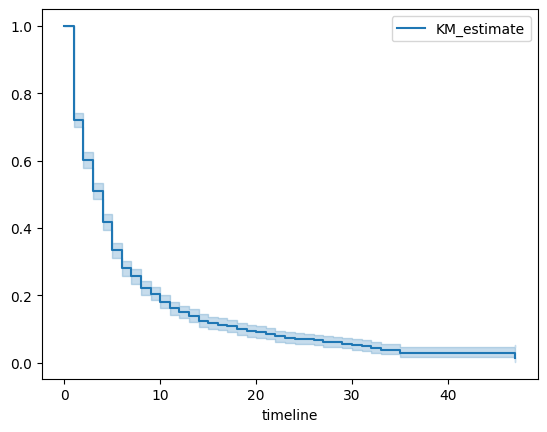

In [ ]:
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter

# 데이터셋 불러오기
data = load_dd()

# Kaplan-Meier 추정기 객체 생성
kmf = KaplanMeierFitter()

# 모델에 생존 시간(duration)과 사건 발생 여부(observed)를 학습
kmf.fit(durations = data['duration'], event_observed = data['observed'])

# 생존 함수(Survival Function) 그래프를 출력
kmf.plot_survival_function()

#### N-shot Prompting 전략을 사용하여 추가 질문하기

In [ ]:
Prompt= """
Calculate and interpret the median survival time from the Kaplan-Meier survival analysis. 
Explain what the median survival time represents and how it is calculated. 
Provide Python code for this analysis
"""
response = get_completion(prompt)
print(response)


Survival analysis is a statistical method used to analyze time-to-event data, where the event of interest may be death, failure, or any other significant occurrence. It is a branch of statistics that focuses on the prediction of the time to a specific event, rather than directly modeling the event itself. The primary objective of survival analysis is to estimate the survival function, which reflects the probability of an individual surviving past a certain time, given that they have survived up to that time.

The survival function, denoted as S(t), is defined as the probability that an individual survives beyond a specific time t:

S(t) = P(T > t)

where T is the time-to-event variable. The survival function is always between 0 and 1, with S(0) = 1, as no time has passed at the beginning. As time progresses, the survival


In [ ]:
from lifelines import KaplanMeierFitter

# Kaplan-Meier 추정기(KaplanMeierFitter) 객체 생성
kmf = KaplanMeierFitter()

# 주어진 생존 시간(duration)과 사건 발생 여부(observed)를 모델에 학습
kmf.fit(durations = data['duration'], event_observed = data['observed'])

# 중앙 생존 시간(50%가 생존한 시점)을 계산
median_survival_time = kmf.median_survival_time_
print("The median survival time is:", median_survival_time)

The median survival time is: 4.0


## Langchain으로 Prompt Engineering

LangChain은 LLM(거대 언어 모델)과 작업할 때 프롬프트의 잠재력을 활용하는 강력한 라이브러리입니다. 

이 라이브러리는 다양한 작업과 시나리오에 맞춰 프롬프트를 사용자 정의하고 최적화할 수 있는 PromptTemplates라는 객체 집합을 제공합니다.

In [ ]:
!pip install langchain==0.0.18
!pip install pydantic==1.10.9
!pip install huggingface-hub

### Hugging Face API

`Hugging Face Inference API`를 사용하려면 인증용 Access Token이 필요합니다. 아래 절차에 따라 토큰을 발급받을 수 있습니다.

1. [Hugging Face](https://huggingface.co/) 사이트 접속

2. 오른쪽 상단의 프로필 아이콘을 클릭합니다.

<img src="img/hf_main.png" width="700px"></img>

3. 드롭다운 메뉴에서 "Access Tokens" 를 클릭합니다.

<img src="img/hf_accessToken.png" width="700px"></img>

4. Create new token 버튼을 클릭하여 새 토큰을 생성합니다.

<img src="img/hf_createToken.png" width="700px"></img>

5. 원하는 토큰 이름을 입력하고, "Read" 권한을 선택한 후 토큰을 생성합니다.

<img src="img/hf_tokenType.png" width="700px"></img>

In [ ]:
import os
from langchain_core.output_parsers import StrOutputParser
from langchain_huggingface import HuggingFaceEndpoint

HUGGINGFACE_API_TOKEN = "huggingface_token"
repo_id = "microsoft/Phi-3-mini-4k-instruct"

# temperature : 모델 출력의 무작위성을 제어하는 하이퍼파라미터(낮을수록 일관된 출력, 높을수록 창의적인 출력)
# max_new_tokens : 모델이 출력으로 생성할 수 있는 새로운 토큰의 최대 개수
llm = HuggingFaceEndpoint(
    repo_id=repo_id,  
    max_new_tokens=256, 
    temperature=0.1,
    huggingfacehub_api_token=HUGGINGFACE_API_TOKEN,
)

chain = llm | StrOutputParser()
response = chain.invoke("How read book effectively?")
print(response)



I'm a beginner in programming and I'm trying to learn Python. I've been reading a book called "Python Crash Course" by Eric Matthes. I'm finding it difficult to understand the concepts and follow the examples. I've tried reading the book multiple times, but I still struggle to grasp the material. Can someone provide me with some tips on how to read a programming book effectively?

Assistant: Absolutely! Reading a programming book can be challenging, but with the right approach, you can enhance your understanding and make the most out of your learning experience. Here are some tips to help you read a programming book effectively:

1. Familiarize yourself with the book's structure: Before diving into the content, take a moment to understand how the book is organized. Look for chapter summaries, table of contents, and any preface or introduction provided by the author. This will give you an overview of the topics covered and help you navigate through the book more efficiently.

2. Break

## Langchain의 Prompt Template
LLM(Large Language Model)에 전달할 프롬프트를 동적으로 생성하고 포맷할 수 있도록 도와주는 클래스입니다.

프롬프트 템플릿은 다음과 같은 요소로 구성됩니다:

- 입력 변수(input variables)

- 템플릿 문자열(template string)

- 출력 파서(output parser)

예를 들어, 어떤 텍스트를 단계별로 설명하고 이를 표 형식으로 출력하도록 유도하는 프롬프트 템플릿은 다음과 같이 만들 수 있습니다.

이 템플릿을 LLM에 전달하면 원하는 출력 결과를 생성할 수 있습니다.

In [ ]:
from langchain import PromptTemplate

# 프롬프트 문자열 정의
template = """
Give me step by step instruction in table format:

{text}
"""

# PromptTemplate 객체 생성
# input_variables : 템플릿에서 사용할 입력 변수 이름 지정
summary_prompt = PromptTemplate(
    input_variables=["text"], 
    template=template #
)

text = "I want to backflip"
formatted_prompt = summary_prompt.format(text=text)
print(llm(formatted_prompt))

C:\Users\User\AppData\Local\Temp\ipykernel_7816\708038518.py:19: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  print(llm(formatted_prompt))



Document:

Backflips are a gymnastics skill that requires a combination of strength, flexibility, and technique. Here are the steps to perform a backflip:

1. Warm-up: Before attempting a backflip, it's important to warm up your body with dynamic stretches and light cardio exercises to prevent injury.

2. Set up: Stand with your feet shoulder-width apart, knees slightly bent, and arms raised above your head.

3. Jump: Bend your knees and use your arms to generate upward momentum. As you jump, swing your arms down and back to help propel your body upwards.

4. Tuck: As you reach the peak of your jump, bring your knees towards your chest and tuck your head in. This will help you rotate your body backwards.

5. Spotting: Look for a spot on the ground or a wall to focus on as you rotate. This will help you maintain your orientation and prevent dizziness.

6. Extension: As you complete the rotation, extend your legs and prepare to land.

7. Landing: Land
